In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score)

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Прогнозирование оттока клиентов банка с помощью методов машинного обучения

### Цель проекта:
Разработать модель машинного обучения для прогнозирования оттока клиентов банка и выявления ключевых факторов, влияющих на это решение.

### Задача машинного обучения:
Бинарная классификация



#### Используемые данные

- *Информация о клиентах банка:*
  - Демографические данные: пол, возраст, страна проживания.
  - Финансовые показатели: кредитный рейтинг, баланс счета, количество продуктов банка (кредиты, депозиты), наличие кредитной карты, предполагаемый доход.
  - Поведенческие характеристики: срок обслуживания в банке, активность использования продуктов.
  - Флаг, указывающий, ушел ли клиент из банка или нет (1 - ушел, 0 - остался).

https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset - ссылка на датасет

In [ ]:
df = pd.read_csv('data.csv')

1. Первичный анализ данных

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,7515,15715907,Onwubiko,699,France,Male,64,9,113109.52,1,1,0,27980.80,1
1,5050,15598894,Holt,784,Spain,Male,38,10,122267.85,1,0,0,145759.93,0
2,549,15595440,Kryukova,508,France,Male,49,7,122451.46,2,1,1,75808.10,0
3,2753,15626787,Wei,698,Spain,Female,31,8,185078.26,1,0,0,115337.74,1
4,8158,15798834,Yefremov,719,Spain,Female,32,7,0.00,1,0,0,76264.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,7176,15638983,Jara,684,France,Female,38,5,133189.40,1,0,0,127388.06,0
4687,2237,15712849,Tung,632,Germany,Male,41,3,126550.70,1,0,0,177644.52,1
4688,4487,15660646,Fanucci,528,France,Male,35,3,156687.10,1,1,0,199320.77,0
4689,5073,15572657,H?,472,France,Male,29,8,102490.27,1,0,1,181224.56,0


In [ ]:
df = df.drop(labels = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,699,France,Male,64,9,113109.52,1,1,0,27980.80,1
1,784,Spain,Male,38,10,122267.85,1,0,0,145759.93,0
2,508,France,Male,49,7,122451.46,2,1,1,75808.10,0
3,698,Spain,Female,31,8,185078.26,1,0,0,115337.74,1
4,719,Spain,Female,32,7,0.00,1,0,0,76264.27,0


In [ ]:
#сводную статистику
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000
mean,648.815391,40.769132,4.957365,80284.158096,1.516308,0.703262,0.472607,100482.321938,0.434236
std,97.420794,10.726956,2.892143,61592.103914,0.654247,0.456869,0.499302,57355.869964,0.495709
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,583.000000,33.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51940.320000,0.000000
50%,650.000000,39.000000,5.000000,101191.830000,1.000000,1.000000,0.000000,100324.010000,0.000000
75%,716.500000,47.000000,7.000000,128685.605000,2.000000,1.000000,1.000000,149980.955000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      4691 non-null   int64  
 1   Geography        4691 non-null   object 
 2   Gender           4691 non-null   object 
 3   Age              4691 non-null   int64  
 4   Tenure           4691 non-null   int64  
 5   Balance          4691 non-null   float64
 6   NumOfProducts    4691 non-null   int64  
 7   HasCrCard        4691 non-null   int64  
 8   IsActiveMember   4691 non-null   int64  
 9   EstimatedSalary  4691 non-null   float64
 10  Exited           4691 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 403.3+ KB


In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

2. Предобработка данных

Переведм текствоые данные в числовые:

In [ ]:
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,699,0,1,64,9,113109.52,1,1,0,27980.80,1
1,784,2,1,38,10,122267.85,1,0,0,145759.93,0
2,508,0,1,49,7,122451.46,2,1,1,75808.10,0
3,698,2,0,31,8,185078.26,1,0,0,115337.74,1
4,719,2,0,32,7,0.00,1,0,0,76264.27,0
...,...,...,...,...,...,...,...,...,...,...,...
4686,684,0,0,38,5,133189.40,1,0,0,127388.06,0
4687,632,1,1,41,3,126550.70,1,0,0,177644.52,1
4688,528,0,1,35,3,156687.10,1,1,0,199320.77,0
4689,472,0,1,29,8,102490.27,1,0,1,181224.56,0


3. Разведывательный анализ данных

<Axes: ylabel='count'>

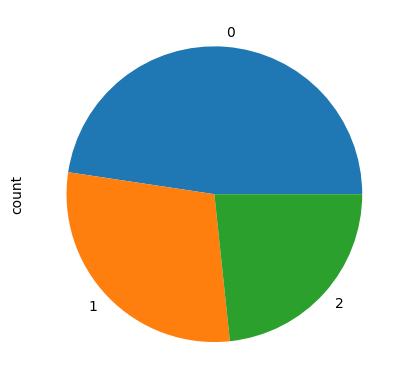

In [ ]:
df['Geography'].value_counts().plot(kind = 'pie')

In [ ]:
pd.crosstab(df['Exited'], df['Geography'], normalize = 'columns')* 100

Geography,0,1,2
Exited,,,
0,63.742167,40.278797,62.248629
1,36.257833,59.721203,37.751371


<Axes: ylabel='count'>

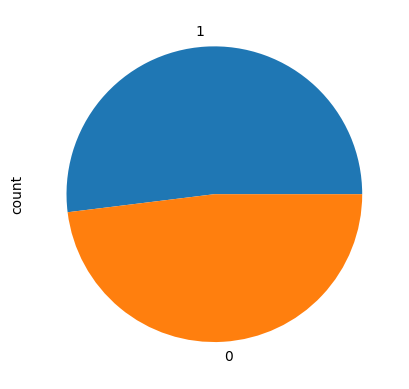

In [ ]:
df['Gender'].value_counts().plot(kind = 'pie')

In [ ]:
df['Gender'].value_counts()

Gender
1    2437
0    2254
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['Exited'], df['Gender'], normalize = 'columns') * 100

Gender,0,1
Exited,,
0,49.467613,63.151416
1,50.532387,36.848584


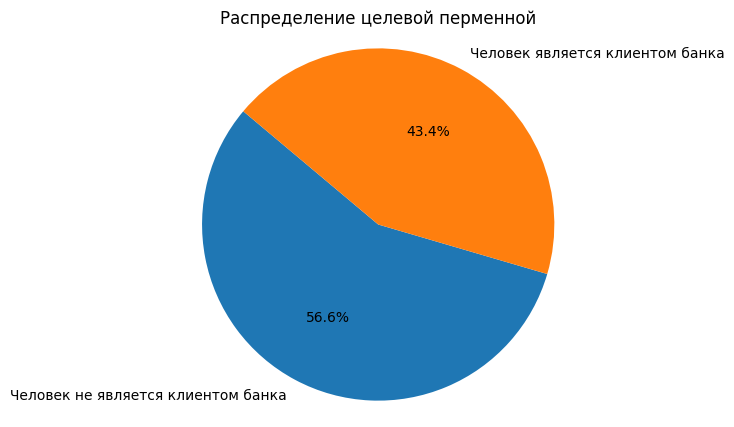

In [ ]:

Exited_counts = df['Exited'].value_counts()
new_labels = {
    1.0: "Человек не является клиентом банка",
    0.0: "Человек является клиентом банка"
}
plt.figure(figsize=(5, 5))
plt.pie(Exited_counts, labels=new_labels.values(), autopct='%1.1f%%', startangle=140)
plt.title('Распределение целевой перменной')
plt.axis('equal')

plt.show()

Данные относительно сбалансированы 13%

4. Отбор признаков (Feature selection)

In [ ]:
X = df.drop(labels = 'Exited', axis = 1)
y = df['Exited']

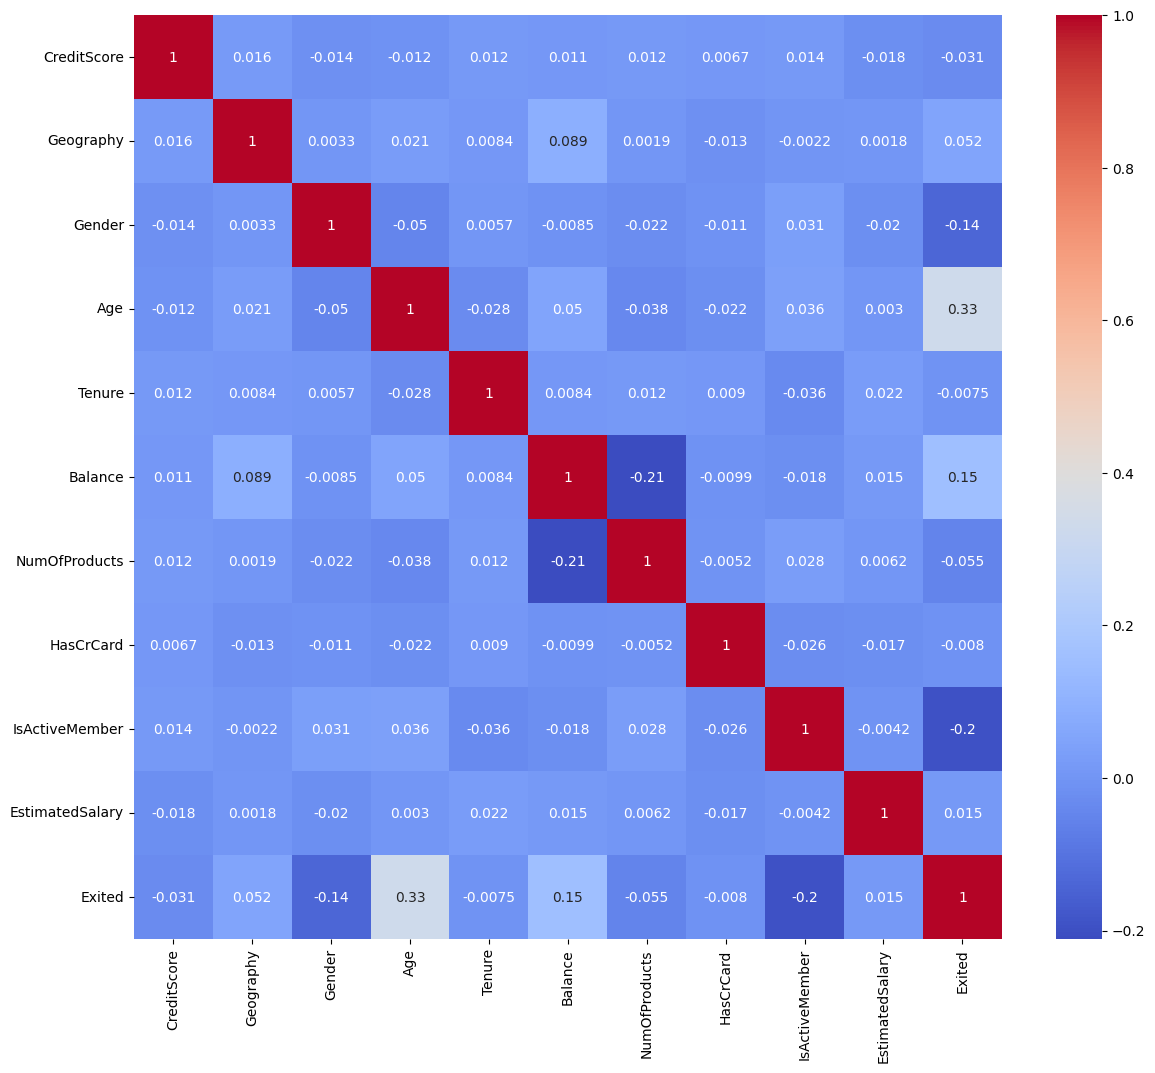

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

5. Выполним отбор признаков:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Для оценки моделей машинного обучения я буду использовать следующие метрики:

1. **Accuracy (Точность)** - процент правильно классифицированных образцов. Подходит для сбалансированных данных.
2. **Precision (Точность)** - доля  ушетших клиентов из банка ко всем ко всем клентам, спрогнозированных моделью. Важна при наличии высокого числа ложных срабатываний.
3. **Recall (Полнота)** - Доля клиентов, которые действительно покинули банк, среди всех клиентов, которые покинули банк в действительности
4. **F1-Score** - гармоническое среднее точности и полноты. Полезна, когда важно найти баланс между точностью и полнотой.

5. **Кривые Roc** - являются графическим представлением производительности бинарного классификатора.

Эти метрики позволят оценить качество моделей с разных сторон и выбрать наиболее подходящую для предсказания оттока клиентов.

In [ ]:
models  = {
    'Логистическая Регрессия': LogisticRegression(),
    'Случайный Лес': RandomForestClassifier(),
    'Градиентный Бустинг': GradientBoostingClassifier(),
    'K-ближайших Соседей': KNeighborsClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))

Model: Логистическая Регрессия
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       519
           1       0.61      0.50      0.55       420

    accuracy                           0.63       939
   macro avg       0.63      0.62      0.62       939
weighted avg       0.63      0.63      0.63       939

Model: Случайный Лес
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       519
           1       0.78      0.65      0.71       420

    accuracy                           0.76       939
   macro avg       0.77      0.75      0.76       939
weighted avg       0.77      0.76      0.76       939

Model: Градиентный Бустинг
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       519
           1       0.79      0.70      0.74       420

    accuracy                           0.78       939
   macro avg       0.78      0.77      0.77      

**Градиентный Бустинг** и **Случайный Лес** показали наилучшие результаты, достигнув точности (accuracy) 0.78 и 0.77 соответственно. Они также продемонстрировали хорошие значения точности и полноты для обоих классов.

**Логистическая Регрессия** показала среднюю точность (0.63), уступая двум лидерам.

**K-ближайших Соседей** оказалась наименее эффективной, с точностью всего 0.54.

По итогу была выбрана модель Случайного Леса

In [ ]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7700
Precision: 0.7965
Recall: 0.6524
F1 Score: 0.7173


In [ ]:
#добавляет вычисление метрик для построения ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

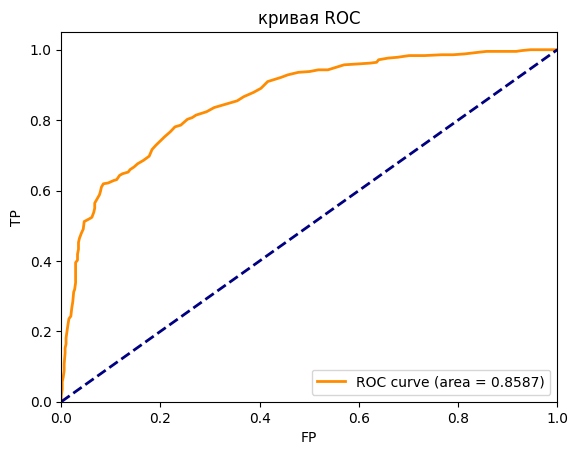

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('кривая ROC')
plt.legend(loc="lower right")
plt.show()

*Основные выводы:*

- **AUC (площадь под кривой)** равна 0.8587. Это значение значительно выше 0.5  и близко к 1. Чем ближе значение AUC к 1, тем лучше модель разделяет классы.

- **Кривая поднимается достаточно круто вверх, а не идет по диагонали.** Это свидетельствует о том, что при низких значениях False Positive Rate (FPR), то есть когда модель делает мало ложных срабатываний, True Positive Rate (TPR) достаточно высок, то есть модель правильно идентифицирует значительную часть клиентов, склонных к оттоку.

- **В целом, можно сделать вывод, что модель хорошо справляется с классификацией** и может быть полезна для задачи прогнозирования оттока клиентов.

###Подбор гиперпараметров для  Случайного Леса

Попробуем подобрать наилучшие параметры для модели, чтобы улучшить её результат

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Создание и обучение модели
bm =  RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1)
bm.fit(X_train, y_train)
y_pred_bm = bm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_bm))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       519
           1       0.80      0.66      0.72       420

    accuracy                           0.77       939
   macro avg       0.78      0.76      0.76       939
weighted avg       0.77      0.77      0.77       939



кросс-валидация:

In [ ]:
cv = StratifiedKFold(n_splits=5)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

scores = {metric: cross_val_score(bm, X_train, y_train, cv=cv, scoring=metric) for metric in scoring_metrics}
for metric in scoring_metrics:
    print(f'{metric.capitalize()} - Mean: {np.mean(scores[metric]):.4f}, Std: {np.std(scores[metric]):.4f}')

Accuracy - Mean: 0.7727, Std: 0.0131
Precision - Mean: 0.7805, Std: 0.0183
Recall - Mean: 0.6784, Std: 0.0280
F1 - Mean: 0.7270, Std: 0.0179


Применение кросс-валидации позволило получить более надежную и реалистичную оценку качества модели "Случайный лес". Модель демонстрирует хорошие и стабильные результаты.

###Ансамблевая модель

Попробуем построить ансамблевую модель стэккинга и получить метамодель случайного леса, сравним её с обычной моделью


In [ ]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1)),
    ('gb', GradientBoostingClassifier()),
    ('knn', KNeighborsClassifier())
]

meta_model = LogisticRegression()

In [ ]:
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                               ('gb', GradientBoostingClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred = stacking_clf.predict(X_test)
y_pred_prob = stacking_clf.predict_proba(X_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1.0)
recall = recall_score(y_test, y_pred, pos_label=1.0)
f1 = f1_score(y_test, y_pred, pos_label=1.0)

In [ ]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7817
Precision: 0.7898
Recall: 0.6976
F1 Score: 0.7408


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1.0)
roc_auc = roc_auc_score(y_test, y_pred_prob)

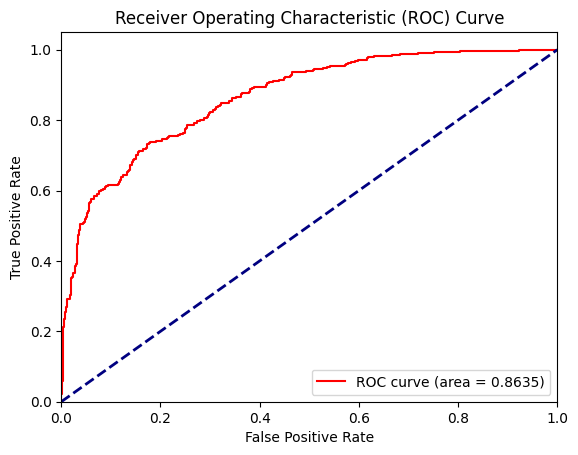

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='red', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Как мы видим, модель обученная с помощью стекинга лучше, чем модель случайного леса

In [ ]:
feature_names = X.columns
feature_importances = np.zeros(X_train.shape[1])

for name, model in stacking_clf.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances += model.feature_importances_

feature_importances /= len(base_models)

feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
print("Наиболее значимые признаки:")
print(feature_importances_df)

Наиболее значимые признаки:
           feature  importance
3              Age    0.218459
6    NumOfProducts    0.137688
5          Balance    0.080313
9  EstimatedSalary    0.054852
0      CreditScore    0.052035
8   IsActiveMember    0.045512
4           Tenure    0.028468
1        Geography    0.027057
2           Gender    0.015765
7        HasCrCard    0.006517


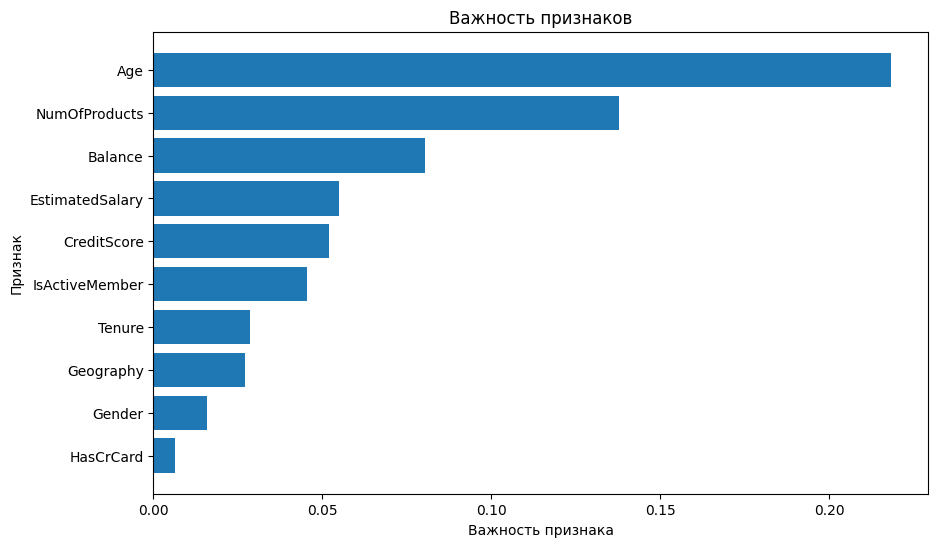

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.show()

В процессе выполнения проекта был проведен комплексный анализ данных о клиентах банка с целью построения модели, прогнозирующей отток.

1. **Подготовка данных:**
   - На первом этапе данные были загружены, очищены от нерелевантной информации и прошли предобработку: категориальные признаки были преобразованы в числовой формат, а числовые - нормализованы.

2. **Разведочный анализ:**
   - Для выявления взаимосвязей между признаками был проведен разведочный анализ данных, включающий визуализацию распределений и построение корреляционной матрицы.

3. **Создание и отбор признаков:**
   - На основе анализа были отобраны наиболее значимые признаки, которые использовались для последующего обучения моделей.

4. **Обучение и оценка моделей:**
   - Были обучены и оценены следующие модели машинного обучения:
     - Логистическая регрессия
     - Случайный лес
     - Градиентный бустинг
     - K-ближайших соседей

5. **Результаты кросс-валидации:**
   - Лучшая модель, отобранная по итогам кросс-валидации, продемонстрировала следующие результаты:
     - Accuracy: 0.7769 (Std: 0.0094)
     - Precision: 0.7714 (Std: 0.0155)
     - Recall: 0.6802 (Std: 0.0275)
     - F1 Score: 0.7201 (Std: 0.0206)

6. **Ансамблевая модель:**
   - Для дальнейшего повышения точности прогнозирования была построена ансамблевая модель (StackingClassifier), объединяющая несколько базовых моделей и мета-модель.

7. **Результаты ансамблевой модели:**
   - Ансамблевая модель показала следующие метрики:
     - Accuracy: 0.7827
     - Precision: 0.7888
     - Recall: 0.7024
     - F1 Score: 0.7431

8. **Выводы:**
   - Ансамблевая модель продемонстрировала небольшое, но статистически значимое преимущество по сравнению с лучшей из базовых моделей по всем ключевым метрикам. Это подтверждает эффективность ансамблевых методов для повышения точности и надежности прогнозирования оттока клиентов.
   - Использование методов машинного обучения для предсказания оттока клиентов в банке позволило создать эффективную модель, способную с высокой точностью и полнотой предсказывать, какие клиенты могут покинуть банк.
